## Pre process the data and formed new data set 
### 1) --in pre processing we had removed the source and destination column because the source and destionaltion are same for all datasets 
### 2)-- now in the guven dataset we were having the date and time columns of data type date and column now i had cinverted it to integer 
### 3)-- we were having the airline numbers as (alpha,beta,gamma,omega),converted those values to int respectively (2,1,0,3)
### 4) next column we were having of refundable Ticket of type bool we changed it to integer 
### 5) one column of airine also we were having no of airlines..we changed it to integer as 1,2,3,4,5.... 
### 6) after doing this i had to normalize the data.
### after doing all those steps i got new data set as finaltrain.csv now i will import this data set  and perform the operations in this dataset only 

In [2]:
# import numpy package for arrays and stuff
import numpy as np 
  
# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt
  
# import pandas for importing csv files 
import pandas as pd 

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# import dataset
dataset = pd.read_csv('finaltrain.csv') 
# alternatively open up .csv file to read data
# print the dataset
dataset.head() 


,Unnamed: 0,tic_date,dep_date,arr_date,airline,refund,bag_wt,bag_price,Flighi_no,Ticket_price
0,0,0.577181,0.577435,0.577435,0.000000e+00,2.857158e-14,0.000000e+00,0.000000e+00,5.714316e-14,2.114297e-10
1,1,0.577181,0.577435,0.577435,0.000000e+00,2.857158e-14,9.142906e-13,2.857158e-14,5.714316e-14,2.471442e-10
2,2,0.577181,0.577435,0.577435,0.000000e+00,2.857158e-14,9.142906e-13,2.857158e-14,2.857158e-14,2.614300e-10
3,3,0.577181,0.577435,0.577435,0.000000e+00,2.857158e-14,9.142906e-13,5.714316e-14,2.857158e-14,2.971445e-10
4,4,0.577181,0.577435,0.577435,2.857157e-14,0.000000e+00,5.714314e-13,0.000000e+00,3.142872e-13,2.484869e-10


In [5]:
dataset.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
dataset.head()

,tic_date,dep_date,arr_date,airline,refund,bag_wt,bag_price,Flighi_no,Ticket_price
0,0.577181,0.577435,0.577435,0.000000e+00,2.857158e-14,0.000000e+00,0.000000e+00,5.714316e-14,2.114297e-10
1,0.577181,0.577435,0.577435,0.000000e+00,2.857158e-14,9.142906e-13,2.857158e-14,5.714316e-14,2.471442e-10
2,0.577181,0.577435,0.577435,0.000000e+00,2.857158e-14,9.142906e-13,2.857158e-14,2.857158e-14,2.614300e-10
3,0.577181,0.577435,0.577435,0.000000e+00,2.857158e-14,9.142906e-13,5.714316e-14,2.857158e-14,2.971445e-10
4,0.577181,0.577435,0.577435,2.857157e-14,0.000000e+00,5.714314e-13,0.000000e+00,3.142872e-13,2.484869e-10


In [7]:
x= dataset.iloc[:, 0:8].values
y=dataset.iloc[:,8].values

In [8]:
x[0]

array([5.77181133e-01, 5.77434819e-01, 5.77434819e-01, 0.00000000e+00,
       2.85715821e-14, 0.00000000e+00, 0.00000000e+00, 5.71431642e-14])

In [9]:
y[0]

2.1142970754158496e-10

In [10]:

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [11]:
#Fitting the Linear Regression to the dataset
from sklearn.linear_model import LinearRegression  
lin_regs= LinearRegression()  
lin_regs.fit(x_train,y_train)

LinearRegression()

In [12]:
#Fitting the Polynomial regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(x_train)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y_train) 

LinearRegression()

In [13]:
# fitting the model into decision tree regration
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [14]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score


In [15]:
# predicted output for linear regration 
y_pred = lin_regs.predict(x_test)  
print(y_pred)


[2.80364992e-10 2.67546502e-10 2.88931389e-10 ... 2.92165469e-10
 2.85896039e-10 2.67827534e-10]


In [18]:
np.savetxt('ypred.csv', y_pred, delimiter=',') 

In [16]:
y_pred.to_csv("E:\ml\ml babaji\datathon\conferm\pedicted.csv")

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [ ]:
scorel=r2_score(y_test,y_pred)
print(scorel)
mse=mean_squared_error(y_test,y_pred)
print("mean_sqrd_error is==",mse)
rmsel=np.sqrt(mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is==",rmsel)


0.067019944261972
mean_sqrd_error is== 4.25417642768911e-21
root_mean_squared error of is== 6.522404792474253e-11


In [ ]:
# predicted output for polynomial regration 
yp_pred = lin_reg_2.predict(poly_regs.fit_transform(x_test))  
print(yp_pred)

[2.80124368e-10 2.67391442e-10 2.87400326e-10 ... 2.92857294e-10
 2.85581336e-10 2.67391442e-10]


In [ ]:
scorep=r2_score(y_test,yp_pred)
print(scorep)
mse=mean_squared_error(y_test,yp_pred)
print("mean_sqrd_error is==",mse)
rmsep=np.sqrt(mean_squared_error(y_test,yp_pred))
print("root_mean_squared error of is==",rmsep)

0.06783362035008877
mean_sqrd_error is== 4.2504662501643584e-21
root_mean_squared error of is== 6.519559992947652e-11


In [ ]:
# predict the op for decission tree regration 
yd_pred = regressor.predict(x_test)
print(yd_pred)


[2.69474398e-10 2.69474398e-10 2.62581621e-10 ... 2.69474398e-10
 2.62581621e-10 2.69474398e-10]


In [ ]:
scored=r2_score(y_test,yd_pred)
print(scored)
mse=mean_squared_error(y_test,yd_pred)
print("mean_sqrd_error is==",mse)
rmsed=np.sqrt(mean_squared_error(y_test,yd_pred))
print("root_mean_squared error of is==",rmsed)

0.004212120461991153
mean_sqrd_error is== 4.540565790292329e-21
root_mean_squared error of is== 6.73837205138773e-11


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
valuesr2=['scorel','scorep','scored']
valuesrmse=['rmsel','rmsep','rmsed']

<BarContainer object of 3 artists>

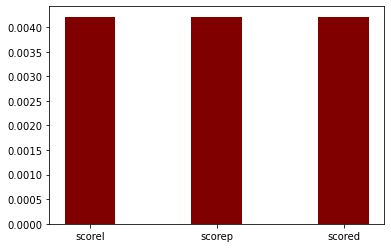

In [ ]:
plt.bar(valuesr2,scored , color ='maroon',width = 0.4)

<BarContainer object of 3 artists>

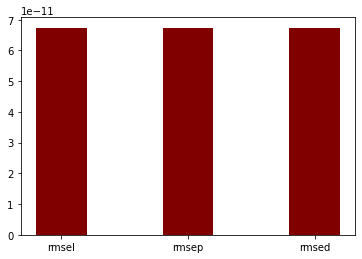

In [ ]:
plt.bar(valuesrmse,rmse, color ='maroon',width = 0.4)

# After looking all this I conclude that the algorithm which computers faster can be implemente in this implemented 
## now who is computing faster the answer is linear regration  